# Leakage toy example 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import flattop

## Defining signals <a class="anchor" id="1"></a>

### Step 1: Define the properties of a sinusoid signal 1 and signal 2 (longer signal) 


In [2]:
# Signal 1 
N = 4080                 # Blocksize (samples)
fs = 1000                # Sampling rate (Hz)
f = 50                   # Sine frequency (Hz)
n = np.arange(N)         # Samples in time domain (samples)
k = np.arange(N)         # Samples in frequency domain (samples)

DeltaF = fs / N          # Resolution

# Signal 1  -- LOnger Blocksize
N2 = 4096  # Blocksize (samples) 
fs2 = 1000  # Sampling rate (Hz)
f2 = 50  # Sine frequency (Hz)
n2 = np.arange(N2)  # Samples in time domain (samples)
k2 = np.arange(N2)  # Samples in frequency domain (samples)

DeltaF = fs2 / N2  # Resolution

### Step 2: Calculate the sine signal

In [3]:
x = np.sin(2 * np.pi * f * n / fs)      # time signal 1
x2 = np.sin(2 * np.pi * f2 * n2 / fs2)  # time signal 2

### Step 3: Calculate the DFT (FFT)

In [4]:
X = np.fft.fft(x) / N      # frequency signal 1
X2 = np.fft.fft(x2) / N2   # frequency signal 2

### Step 4: Plot the result time and frequency domain of singal 1 & signal 2

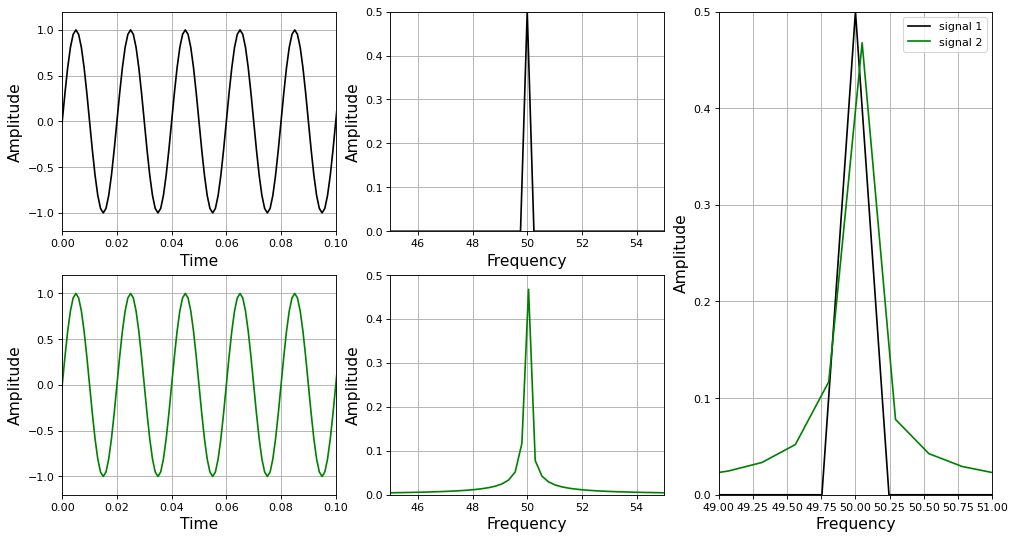

In [5]:
fig = plt.figure(figsize=(15, 8), dpi=80)  # Adjust the figsize and dpi as needed

# signal 1
plt.subplot(231)
plt.plot(n / fs, x,'-k')
plt.axis([0, 0.1, -1.2, 1.2])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(True)
plt.subplot(232)
plt.plot(fs * k / N, np.abs(X),'-k')
plt.xlim([45, 55])
plt.ylim([0, 0.5])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.grid(True)

#signal 2

plt.subplot(234)
plt.plot(n2 / fs2, x2,'-g')
plt.axis([0, 0.1, -1.2, 1.2])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(True)
plt.subplot(235)
plt.plot(fs2 * k2 / N2, np.abs(X2),'-g')
plt.xlim([45, 55])
plt.ylim([0, 0.5])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.grid(True)

# Signal 1 and 2 --- Effect of leakage

plt.subplot(2, 3, (3,6))
plt.plot(fs * k / N, np.abs(X),'-k')
plt.plot(fs2 * k2 / N2, np.abs(X2),'-g')
plt.xlim([49, 51])
plt.ylim([0, 0.5])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.legend(['signal 1', 'signal 2'])
plt.grid(True)

### Step 5: Applying a spectral window

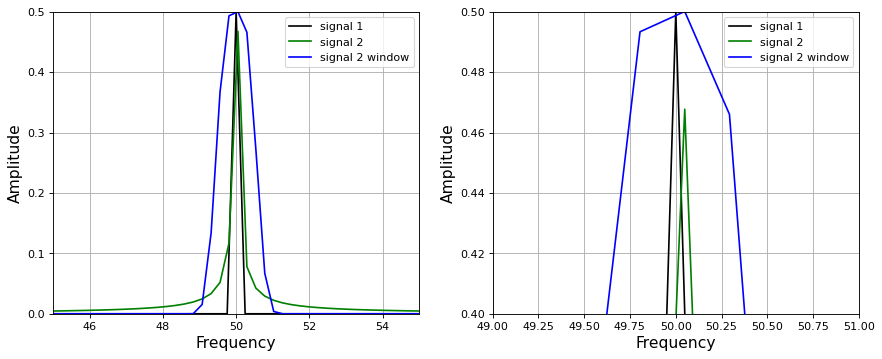

In [6]:
# Apply a spectral window (flattop)
w1 = flattop(N)
w1 = w1 / np.mean(w1)
w2 = flattop(N2)
w2 = w2 / np.mean(w2)
Xw1 = np.fft.fft(x * w1) / N
Xw2 = np.fft.fft(x2 * w2) / N2

# Plotting 
fig = plt.figure(figsize=(13, 5), dpi=80)  # Adjust the figsize and dpi as needed
plt.subplot(121)
plt.plot(fs * k / N, np.abs(X),'-k')        # signal 1
plt.plot(fs2 * k2 / N2, np.abs(X2),'-g')    # signal 2
plt.plot(fs2 * k2 / N2, np.abs(Xw2),'-b')   # signal 2 with window (Flattop)
plt.xlim([45, 55])
plt.ylim([0, 0.5])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.legend(['signal 1', 'signal 2', 'signal 2 window'])
plt.grid(True)

plt.subplot(122)
plt.plot(fs * k / N, np.abs(X),'-k')        # signal 1
plt.plot(fs2 * k2 / N2, np.abs(X2),'-g')    # signal 2
plt.plot(fs2 * k2 / N2, np.abs(Xw2),'-b')   # signal 2 with window (Flattop)
plt.xlim([49, 51])
plt.ylim([0.4, 0.5])
plt.ylabel('Amplitude', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.legend(['signal 1', 'signal 2', 'signal 2 window'])
plt.grid(True)

